In [2]:
import kagglehub
import pandas as pd
import os

dataset = "alexteboul/diabetes-health-indicators-dataset"

path = kagglehub.dataset_download(dataset)

file_path = os.path.join(path, "diabetes_012_health_indicators_BRFSS2015.csv")
df = pd.read_csv(file_path)

print("Dataset path:", file_path)
print("First 5 rows:")
print(df.head())

Dataset path: /Users/tinu/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1/diabetes_012_health_indicators_BRFSS2015.csv
First 5 rows:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0 

253680
253680
"The P-Value is 2.580241456213391e-208


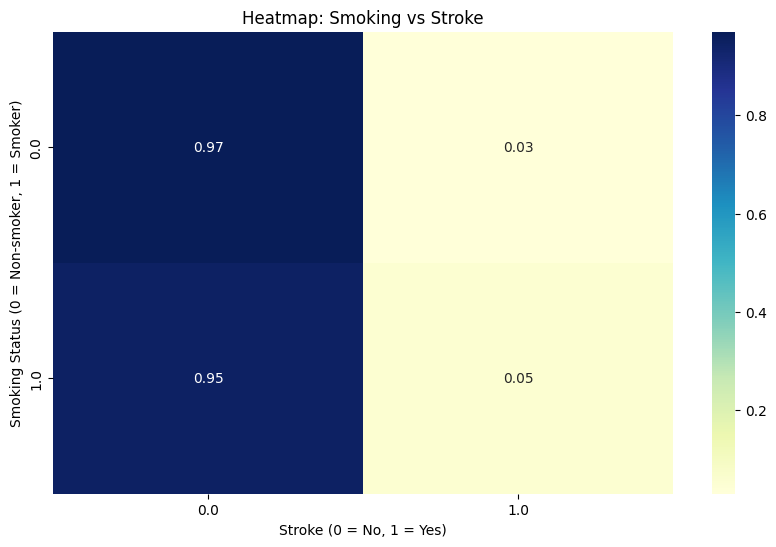

In [3]:
# Length of both columns, since they are the same that means we likely
# don't have missing data
print(len(df['Smoker']))
print(len(df['Stroke']))

# Does being a smoker make you more likely to have a stroke?
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# We will do a hypothesis test of chi square with an alpha value of .05
# Ho: Being a smoker does not change the likelihood of a stroke
# Ha: Being a smoker does change the likelihood of a stroke
table = pd.crosstab(df['Smoker'], df['Stroke'])
chi, p_val, dof, expected = chi2_contingency(table)
print(f'"The P-Value is {p_val}')
# Conclusion: Since the p value of 2.58*10^-208 < .05, we reject the null
# hypothesis. This means that we can say that being a smoker does correlate
# to having a stroke since there appears to be a dependence


# We change the table to be in terms of proportions so we can visualize it in a heatmap
table = pd.crosstab(df['Smoker'], df['Stroke'],normalize = 'index')

# The graph
plt.figure(figsize=(10,6))
sns.heatmap(table, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)

plt.title("Heatmap: Smoking vs Stroke")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Smoking Status (0 = Non-smoker, 1 = Smoker)")

# displaying heatmap
# This shows the proportion of each thing. We can see that there is a higher probability
# That if they are a smoker, they had a stroke, .97 vs .03 than if they are not a smoker
# which is instead .95 vs .05. This shows a higher amount of smokers having a stroke

plt.show()

253680
253680


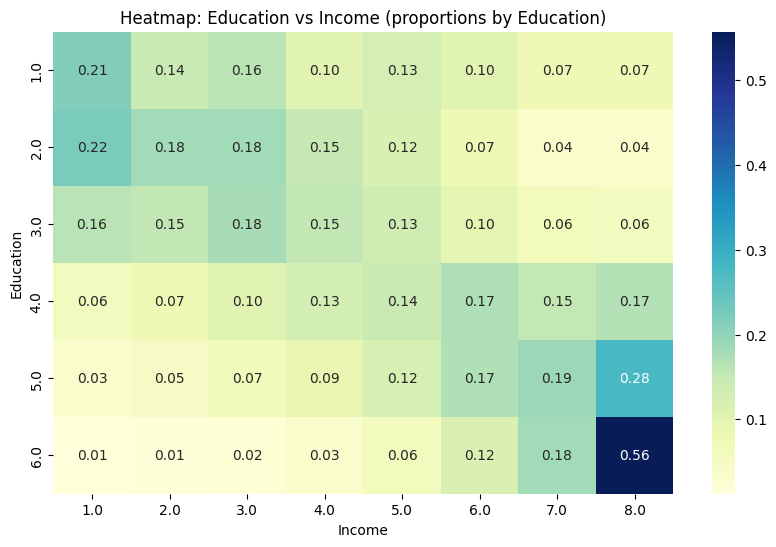

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                 6.409e+04
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        18:47:33   Log-Likelihood:            -5.1609e+05
No. Observations:              253680   AIC:                         1.032e+06
Df Residuals:                  253678   BIC:                         1.032e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2883      0.019     67.175      0.0

In [4]:
# Look at the length of both columns Education and Income to see if there is missing data
print(len(df['Education']))
print(len(df['Income']))

import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross tabulation table of Education vs Income
table = pd.crosstab(df['Education'], df['Income'], normalize='index')  # proportions per Education
plt.figure(figsize=(10,6))
sns.heatmap(table, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Heatmap: Education vs Income (proportions by Education)")
plt.xlabel("Income")
plt.ylabel("Education")
plt.show()

# We will do a linear regression analysis to see if there is a correlation between Education and Income
import statsmodels.api as sm
X = df['Education']
Y = df['Income']
X = sm.add_constant(X)  # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

# Do hypothesis testing to see if the correlation is significant
# Ho: There is no correlation between Education and Income
# Ha: There is a correlation between Education and Income
alpha = 0.05
p_value = model.f_pvalue
print(f"P-Value for the correlation between Education and Income: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between Education and Income.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between Education and Income.")

# Conclusion: Since the p-value is < .05, we reject the null hypothesis. This means that there is a significant correlation between Education and Income.


Average BMI for each Diabetes Category:
   Diabetes_012        BMI
0           0.0  27.742521
1           1.0  30.724466
2           2.0  31.944011
Average BMI for No Diabetes: 27.74
Average BMI for Prediabetes: 30.72
Average BMI for Diabetes: 31.94


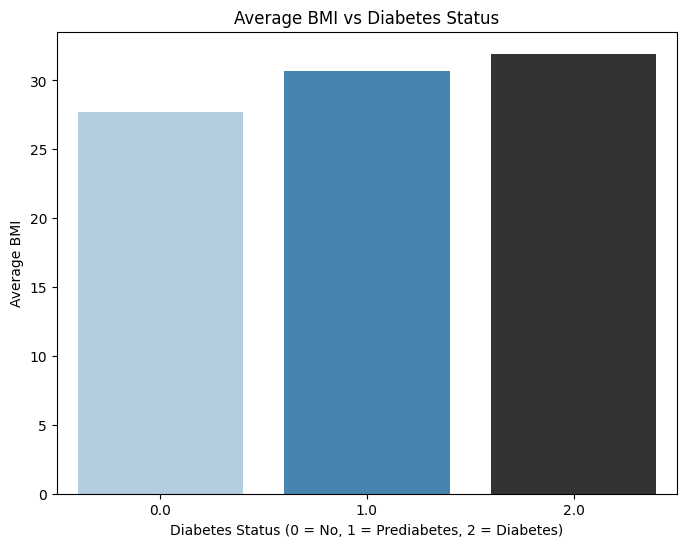

ANOVA test results: F-statistic = 6768.36, p-value = 0.0000


In [ ]:
# Group by diabetes status and compute average BMI
bmi_by_diabetes = df.groupby('Diabetes_012')['BMI'].mean().reset_index()

print("Average BMI for each Diabetes Category:")
print(bmi_by_diabetes)

mean_bmi_no = bmi_by_diabetes.loc[bmi_by_diabetes['Diabetes_012'] == 0, 'BMI'].values[0]
mean_bmi_prediabetes = bmi_by_diabetes.loc[bmi_by_diabetes['Diabetes_012'] == 1, 'BMI'].values[0]
mean_bmi_diabetes = bmi_by_diabetes.loc[bmi_by_diabetes['Diabetes_012'] == 2, 'BMI'].values[0]

print(f"Average BMI for No Diabetes: {mean_bmi_no:.2f}")
print(f"Average BMI for Prediabetes: {mean_bmi_prediabetes:.2f}")
print(f"Average BMI for Diabetes: {mean_bmi_diabetes:.2f}")

plt.figure(figsize=(8,6))
sns.barplot(
    x='Diabetes_012',
    y='BMI',
    hue='Diabetes_012',
    data=bmi_by_diabetes,
    palette='Blues_d',
    legend=False
)

plt.title("Average BMI vs Diabetes Status")
plt.xlabel("Diabetes Status (0 = No, 1 = Prediabetes, 2 = Diabetes)")
plt.ylabel("Average BMI")
plt.show()

# run a an ANOVA test to see if the differences in BMI across diabetes categories are statistically significant
from scipy.stats import f_oneway
bmi_no = df[df['Diabetes_012'] == 0]['BMI']
bmi_prediabetes = df[df['Diabetes_012'] == 1]['BMI']
bmi_diabetes = df[df['Diabetes_012'] == 2]['BMI']
f_stat, p_val = f_oneway(bmi_no, bmi_prediabetes, bmi_diabetes)
print(f"ANOVA test results: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")

# Conclusion comment:
# The average BMI increases with diabetes severity (0 < 1 < 2). This suggests a
# positive relationship between higher BMI and likelihood of diabetes. People
# with diabetes tend to have higher average BMI values than those without.

# ANOVA conclusion:
# Since the p-value from the ANOVA test is < .05, we reject the null hypothesis.
# This indicates that there are statistically significant differences in BMI
# across the three diabetes categories.